# Exercice : Analyse approfondie des employés d’une entreprise tech

**Partie 1 : Chargement et exploration du dataset**

Charger le fichier employees2.csv dans un DataFrame Pandas

In [13]:
import pandas as pd
df = pd.read_csv('employees2.csv')

Afficher les 5 premières lignes du DataFrame

In [14]:
print(df.head(5))

   Unnamed: 0  ID     Name   Age   Salary Department  Years_Experience Remote
0           0   1  Othmane   NaN      NaN         IT                 0    Yes
1           1   2    Ikram  22.0      NaN         HR                23    Yes
2           2   3      Bob   NaN      NaN         HR                26    Yes
3           3   4    Zineb  59.0  73665.0         HR                 3     No
4           4   5    David  57.0  59325.0    Finance                33     No


Vérifier les types de données de chaque colonne

In [15]:
print(df.dtypes)

Unnamed: 0            int64
ID                    int64
Name                 object
Age                 float64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
dtype: object


Identifier les valeurs manquantes par colonne

In [16]:
print(df.isnull().sum())

Unnamed: 0           0
ID                   0
Name                 0
Age                 49
Salary              44
Department           0
Years_Experience     0
Remote               0
dtype: int64


**Partie 2 : Nettoyage des données**

Remplacer les valeurs manquantes dans la colonne Age par la médiane de cette colonne

In [17]:
df['Age']=df['Age'].fillna(df['Age'].median())
print(df ['Age'])

0     45.0
1     22.0
2     45.0
3     59.0
4     57.0
      ... 
95    45.0
96    45.0
97    45.0
98    42.0
99    32.0
Name: Age, Length: 100, dtype: float64


Remplir les valeurs manquantes dans Salaire en utilisant la moyenne par département 

In [18]:
df['salary']=df['Salary'].fillna(df.groupby('Department')['Salary'].transform('mean'))
print(df['Salary'])

0         NaN
1         NaN
2         NaN
3     73665.0
4     59325.0
       ...   
95    82670.0
96    59838.0
97    45811.0
98    73800.0
99        NaN
Name: Salary, Length: 100, dtype: float64


Convertir toutes les colonnes numériques en type approprié (float ou int)

In [19]:
for col in df.select_dtypes(include=['number']).columns:
    if (df[col] % 1 == 0).all():  # Si toutes les valeurs sont des entiers
            df[col] = df[col].astype(int)
    else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

Unnamed: 0            int64
ID                    int64
Name                 object
Age                   int64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
salary              float64
dtype: object


Remplacer les valeurs 'Yes'/'No' dans Remote par 'Oui'/'Non'

In [20]:
df['Remote'] = df['Remote'].replace({'Yes': 'Oui', 'No': 'Non'})
print(df['Remote'])

0     Oui
1     Oui
2     Oui
3     Non
4     Non
     ... 
95    Oui
96    Non
97    Oui
98    Oui
99    Oui
Name: Remote, Length: 100, dtype: object


Créer une nouvelle colonne Ancienneté_Catégorie qui classe les années d’expérience en :
- Junior : < 3 ans
- Intermédiaire : 3–7 ans
- Senior : 8–15 ans
- Expert : > 15 ans

In [21]:
def categorize_experience(years):
    if years < 3:
        return 'Junior'
    elif 3 <= years < 8:
        return 'Intermédiaire'
    elif 8 <= years <= 15:
        return 'Senior'
    else:
        return 'Expert'
df['Ancienneté_Catégorie'] = df['Years_Experience'].apply(categorize_experience)
print(df[['Years_Experience', 'Ancienneté_Catégorie']])

    Years_Experience Ancienneté_Catégorie
0                  0               Junior
1                 23               Expert
2                 26               Expert
3                  3        Intermédiaire
4                 33               Expert
..               ...                  ...
95                21               Expert
96                12               Senior
97                14               Senior
98                13               Senior
99                19               Expert

[100 rows x 2 columns]


**Partie 3 : Analyses exploratoires et statistiques**

Calculer le salaire moyen global

In [22]:
print(df['Salary'].mean())

64461.96428571428


l’employé(e) avec le salaire le plus élevé

In [23]:
highest_salary_employee = df.loc[df['Salary'].idxmax()]
print("Employé(e) avec le salaire le plus élevé :") 
print(highest_salary_employee[['Name', 'Salary']])

Employé(e) avec le salaire le plus élevé :
Name        Jalil
Salary    84685.0
Name: 27, dtype: object


Calculer le salaire moyen par département

In [24]:
salary_by_department = df.groupby('Department')['Salary'].mean().reset_index()
print("\nSalaire moyen par département :")
print(salary_by_department)


Salaire moyen par département :
  Department        Salary
0    Finance  57836.583333
1         HR  61659.733333
2         IT  69930.000000
3  Logistics  64544.750000
4  Marketing  70395.153846


Calculer la moyenne et la médiane des salaires par groupe d’ancienneté

In [25]:
salary_by_experience = df.groupby('Ancienneté_Catégorie')['Salary'].agg(['mean', 'median']).reset_index()
print("\nMoyenne et médiane des salaires par groupe d’ancienneté :")
print(salary_by_experience)


Moyenne et médiane des salaires par groupe d’ancienneté :
  Ancienneté_Catégorie          mean   median
0               Expert  63605.969697  60057.0
1        Intermédiaire  68405.444444  66906.0
2               Junior  55821.666667  48758.0
3               Senior  66159.909091  73800.0


Compter combien d’employés travaillent en télétravail (Remote) par département

In [26]:
remote_count_by_department = df[df['Remote'] == 'Oui'].groupby('Department').size().reset_index(name='Count')
print("\nNombre d’employés en télétravail par département :")
print(remote_count_by_department)


Nombre d’employés en télétravail par département :
  Department  Count
0    Finance      7
1         HR     13
2         IT      9
3  Logistics      8
4  Marketing     18


**Partie 4 : Tableaux croisés dynamiques (pivot tables)**

Créer un tableau croisé dynamique montrant le salaire moyen par département et par télétravail

In [27]:
pivot_table = df.pivot_table(values='Salary', index='Department', columns='Remote', aggfunc='mean').reset_index()
print("\nTableau croisé dynamique du salaire moyen par département et par télétravail :")
print(pivot_table)


Tableau croisé dynamique du salaire moyen par département et par télétravail :
Remote Department        Non           Oui
0         Finance  62919.875  47670.000000
1              HR  63830.750  59178.571429
2              IT  63577.500  72047.500000
3       Logistics  65482.750  63606.750000
4       Marketing  68356.000  70765.909091


Créer un autre tableau croisé dynamique montrant le nombre moyen d’années d’expérience par groupe d’âge et par département

In [28]:
pivot_table_experience = df.pivot_table(values='Years_Experience', index='Age', columns='Department', aggfunc='mean').reset_index()
print("\nTableau croisé dynamique du nombre moyen d’années d’expérience par groupe d’âge et par département :")
print(pivot_table_experience)


Tableau croisé dynamique du nombre moyen d’années d’expérience par groupe d’âge et par département :
Department  Age    Finance         HR    IT  Logistics  Marketing
0            22        NaN  23.000000   NaN        NaN        NaN
1            23        NaN  21.000000   NaN        NaN        NaN
2            25        NaN        NaN   NaN        NaN  19.000000
3            26        NaN  24.000000   NaN        NaN        NaN
4            27        NaN        NaN  16.0        NaN  17.000000
5            29        NaN        NaN  10.0  19.000000        NaN
6            30        NaN        NaN   NaN  27.500000        NaN
7            31        NaN  27.000000   NaN        NaN        NaN
8            32  28.500000        NaN   NaN   6.000000  19.000000
9            33  33.000000        NaN   NaN        NaN        NaN
10           36  22.000000        NaN   NaN        NaN        NaN
11           37        NaN        NaN   NaN        NaN   4.000000
12           40        NaN        NaN   

**Partie 5 : Calculs avancés avec NumPy**

Utiliser np.where() pour créer une colonne Performance :
- "Bon" si Salaire < 60000
- "Moyen" si 60000 ≤ Salaire < 80000
- "Haut" si Salaire ≥ 80000 

In [31]:
import numpy as np

df['Performance'] = np.where(df['Salary'] < 60000, 'Bon',
                              np.where(df['Salary'] < 80000, 'Moyen', 'Haut'))
print("\nColonne Performance :")
print(df[['Name', 'Salary', 'Performance']])


Colonne Performance :
       Name   Salary Performance
0   Othmane      NaN        Haut
1     Ikram      NaN        Haut
2       Bob      NaN        Haut
3     Zineb  73665.0       Moyen
4     David  59325.0         Bon
..      ...      ...         ...
95      Bob  82670.0        Haut
96      Eva  59838.0         Bon
97   Nassim  45811.0         Bon
98   Nassim  73800.0       Moyen
99  Othmane      NaN        Haut

[100 rows x 3 columns]


Utiliser np.select() pour classer les employés selon leur âge et leur ancienneté :
- Jeune & Nouveau
- Jeune & Expérimenté
- Senior & Nouveau
 Senior & Expérimenté

In [32]:
conditions = [
    (df['Age'] < 30) & (df['Ancienneté_Catégorie'] == 'Junior'),
    (df['Age'] < 30) & (df['Ancienneté_Catégorie'] != 'Junior'),
    (df['Age'] >= 30) & (df['Ancienneté_Catégorie'] == 'Senior'),
    (df['Age'] >= 30) & (df['Ancienneté_Catégorie'] != 'Senior')
]
choices = [
    'Jeune & Nouveau',
    'Jeune & Expérimenté',
    'Senior & Nouveau',
    'Senior & Expérimenté'
]
df['Classification'] = np.select(conditions, choices, default='Autre')
print("\nClassification des employés :")
print(df[['Name', 'Age', 'Ancienneté_Catégorie', 'Classification']])


Classification des employés :
       Name  Age Ancienneté_Catégorie        Classification
0   Othmane   45               Junior  Senior & Expérimenté
1     Ikram   22               Expert   Jeune & Expérimenté
2       Bob   45               Expert  Senior & Expérimenté
3     Zineb   59        Intermédiaire  Senior & Expérimenté
4     David   57               Expert  Senior & Expérimenté
..      ...  ...                  ...                   ...
95      Bob   45               Expert  Senior & Expérimenté
96      Eva   45               Senior      Senior & Nouveau
97   Nassim   45               Senior      Senior & Nouveau
98   Nassim   42               Senior      Senior & Nouveau
99  Othmane   32               Expert  Senior & Expérimenté

[100 rows x 4 columns]


Calculer la différence entre le salaire de chaque employé et le salaire moyen de son département

In [33]:
df['Salary_Difference'] = df['Salary'] - df.groupby('Department')['Salary'].transform('mean')
print("\nDifférence de salaire par rapport au salaire moyen du département :")
print(df[['Name', 'Department', 'Salary', 'Salary_Difference']])


Différence de salaire par rapport au salaire moyen du département :
       Name Department   Salary  Salary_Difference
0   Othmane         IT      NaN                NaN
1     Ikram         HR      NaN                NaN
2       Bob         HR      NaN                NaN
3     Zineb         HR  73665.0       12005.266667
4     David    Finance  59325.0        1488.416667
..      ...        ...      ...                ...
95      Bob  Marketing  82670.0       12274.846154
96      Eva    Finance  59838.0        2001.416667
97   Nassim    Finance  45811.0      -12025.583333
98   Nassim  Marketing  73800.0        3404.846154
99  Othmane  Marketing      NaN                NaN

[100 rows x 4 columns]


**Partie 6 : Visualisation (Bonus)**

Afficher la distribution des salaires

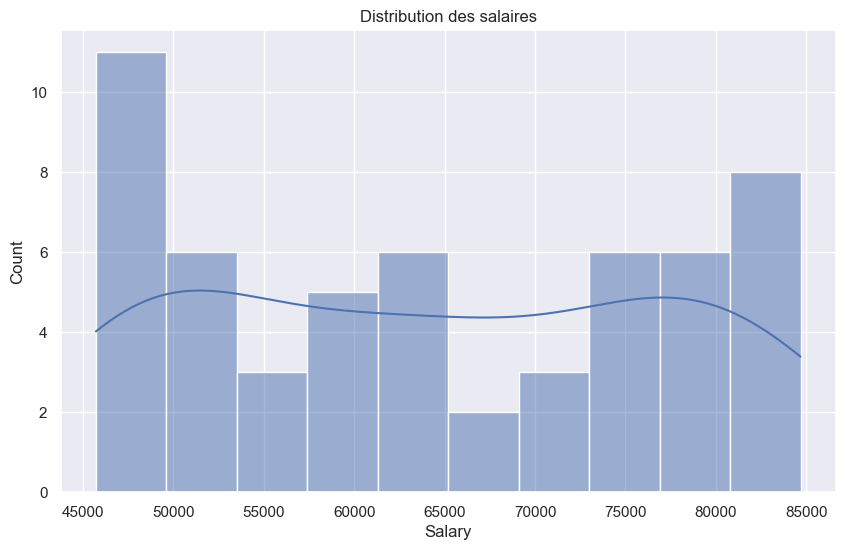

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Afficher la distribution des salaires
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title('Distribution des salaires')
plt.show()

Comparer les salaires moyens par département sous forme de barplot

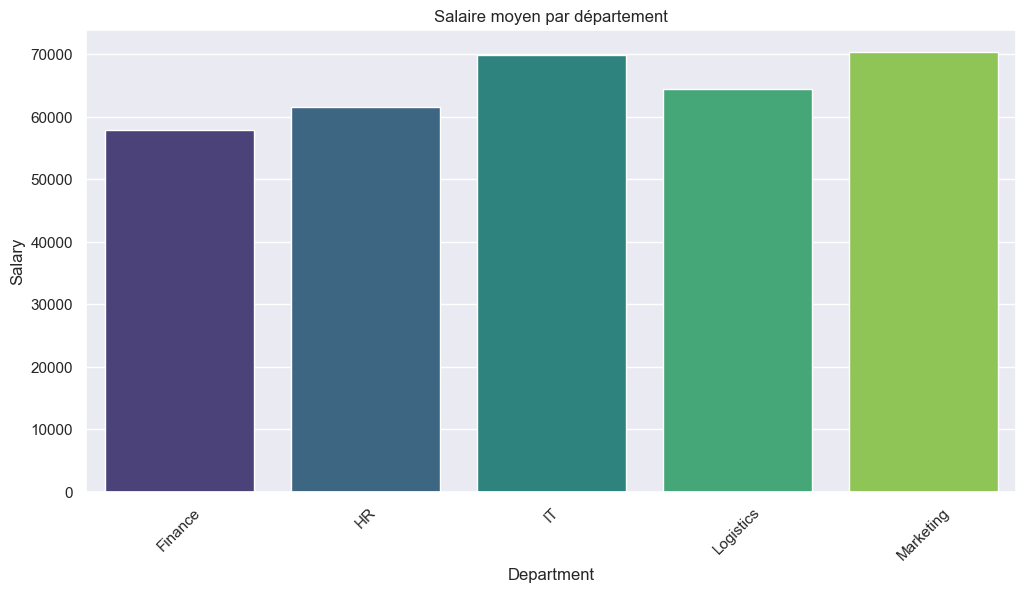

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='Department', y='Salary', data=salary_by_department, hue='Department', palette='viridis')
plt.title('Salaire moyen par département')
plt.xticks(rotation=45)
plt.show()

Boxplot des salaires par groupe d’ancienneté

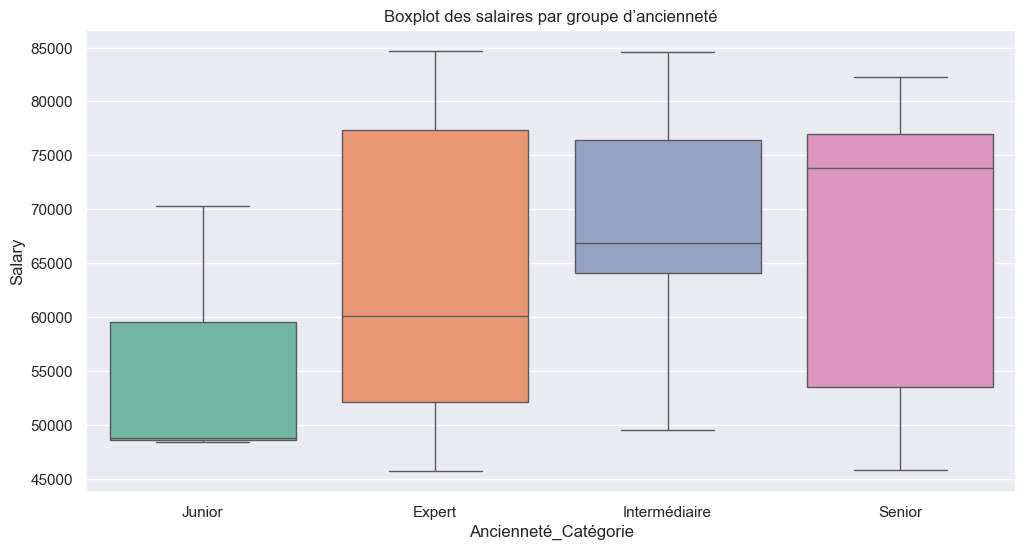

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Ancienneté_Catégorie', y='Salary', data=df, hue='Ancienneté_Catégorie', palette='Set2')
plt.title('Boxplot des salaires par groupe d’ancienneté')
plt.show()